In [130]:
import numpy as np 
#import cupy as cp
import matplotlib.pyplot as plt
from scipy.special import jv

import os
import re
import sys

In [131]:
E = 100
z = 0.5
Lp = 4 * E * z * (1 - z)
omega = E * z * (1 - z)
vertex = "gamma_qq"
t = 1.0


#htl_str = "data/fsol_final_htl_" + vertex + "__E_" + str(int(E)) + "_z_0.5_q_1.5_mu_0.4.dat"
yuk_str = "data/fsol_final_yuk_" + vertex + "__E_" + str(int(E)) + "_z_0.5_q_1.5_mu_0.6.dat"
ho_str = "data/fsol_final_ho_" + vertex + "__E_" + str(int(E)) + "_z_0.5_q_1.5_mu_0.6.dat"

#htl = np.loadtxt(htl_str).T[0] + 1j * np.loadtxt(htl_str).T[1]
yuk = np.loadtxt(yuk_str).T[0] + 1j * np.loadtxt(yuk_str).T[1]
ho  = np.loadtxt(ho_str).T[0] + 1j * np.loadtxt(ho_str).T[1]

Np = len(yuk)
P = np.linspace(0, Lp, Np, dtype=np.float64)


In [132]:
def in_out_harmonic(p, t, omega, qtilde):
    qab = 0
    if vertex == "gamma_qq":
        qab = 3/2 * qtilde * 5.067**2
    elif vertex == "q_qg":
        qab = (3 * (1-z) + 4/3 * z**2) * qtilde * 5.067**2
    else:
        qab = 3/2 * (1 + z**2 + (1-z)**2) * qtilde * 5.067**2
    omega = omega * 5.067
    p = p * 5.067
    Omega = (1-1j)/2 * np.sqrt(qab/omega)

    return -2*(1 - np.exp(-1j/(2*omega*Omega) * np.tan(Omega * t) * p**2))



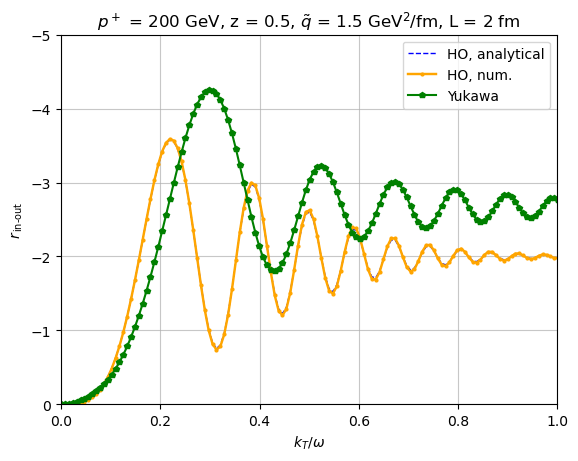

In [133]:
IN_OUT_HO = in_out_harmonic(P, t, omega, qtilde=1.5)
plt.plot(P[:-10]/omega, np.real(IN_OUT_HO[:-10]) , "--", label='HO, analytical', color = "blue", linewidth = 1)
plt.plot(P[:-10]/omega , P[:-10]/omega*np.real(ho[:-10]),  marker='o', linewidth = 1.75, markersize = 2, label='HO, num.', color = "orange")
#plt.plot(P[:-10]/omega , P[:-10]/omega*np.real(htl[:-10]), label='HTL', marker='^', markersize = 3, color = "red")
plt.plot(P[:-10]/omega , P[:-10]/omega*np.real(yuk[:-10]),  marker='p', markersize = 4, label='Yukawa', color = "green")

#plt.plot(P[:-10], -2+ 2*0.4**4/(0.002*P[:-10]**2 + 0.4**2)**2)
plt.xlabel(r'$k_T/\omega$')
plt.xlim(0, 1)
plt.ylim(0, -5)
plt.ylabel(r'$r_{\, \text{in-out}}$')
plt.legend()
plt.title(r'$p^+$ = 200 GeV, z = 0.5, $\tilde{q}$ = 1.5 GeV$^2$/fm, L = 2 fm')
plt.grid(alpha = 0.7)

plt.show()

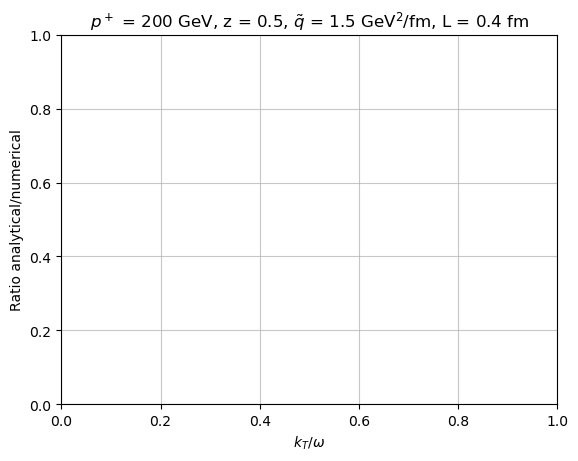

In [134]:
#plt.plot(IN_OUT_HO/( P/omega*np.real(ho)), marker='o', linewidth = 1.75, markersize = 2, label='HO ratio', color = "orange")
plt.xlabel(r'$k_T/\omega$')
plt.ylabel(r'Ratio analytical/numerical')
plt.title(r'$p^+$ = 200 GeV, z = 0.5, $\tilde{q}$ = 1.5 GeV$^2$/fm, L = 0.4 fm')
plt.grid(alpha = 0.7)   

/tmp/ipykernel_645659/2258830172.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


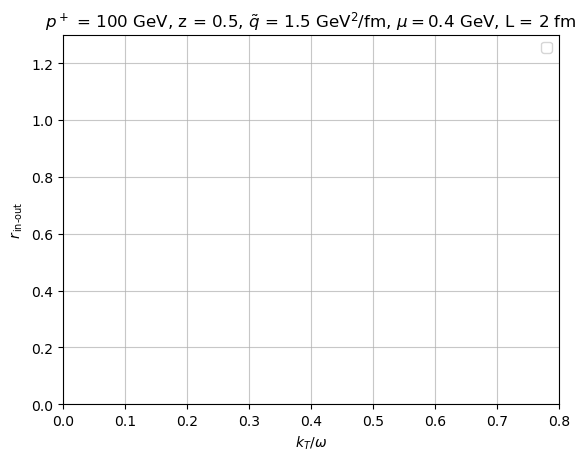

In [135]:
#plt.plot(P[:-10]/omega , np.real(htl[:-10]/yuk[:-10]), label='Ratio HTL/Yuk', color = "red")

#plt.plot(P[:-10], -2+ 2*0.4**4/(0.002*P[:-10]**2 + 0.4**2)**2)
plt.xlabel(r'$k_T/\omega$')
plt.ylim(0, 1.3)
plt.xlim(0, 0.8)
plt.ylabel(r'$r_{\, \text{in-out}}$')
plt.legend()
plt.title(r'$p^+$ = 100 GeV, z = 0.5, $\tilde{q}$ = 1.5 GeV$^2$/fm, $\mu = 0.4$ GeV, L = 2 fm')
plt.grid(alpha = 0.7)

plt.show()

/tmp/ipykernel_645659/2165532867.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(P[:-10]/omega, np.real(IN_OUT_HO[:-10]) / (P[:-10]/omega)  , "--", label='HO, analytical', color = "blue", linewidth = 1)


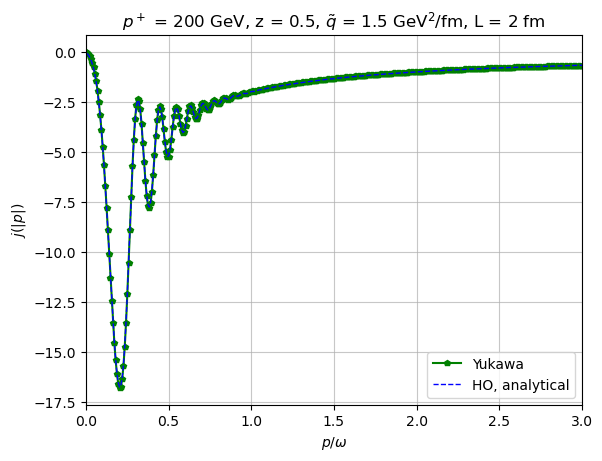

In [136]:
#plt.plot(P[:-10]/omega , np.real(ho[:-10]),  marker='o', linewidth = 1.75, markersize = 2, label='HO, num.', color = "orange")
#slt.plot(P[:-10]/omega , np.real(htl[:-10]), label='HTL', marker='^', markersize = 3, color = "red")
plt.plot(P[:-10]/omega ,np.real(ho[:-10]),  marker='p', markersize = 4, label='Yukawa', color = "green")
plt.plot(P[:-10]/omega, np.real(IN_OUT_HO[:-10]) / (P[:-10]/omega)  , "--", label='HO, analytical', color = "blue", linewidth = 1)

#plt.plot(P[:-10], -2+ 2*0.4**4/(0.002*P[:-10]**2 + 0.4**2)**2)
plt.xlabel(r'$p/\omega$')
plt.xlim(0, 3.0)
plt.ylabel(r'$j(|p|)$')
plt.legend()
plt.title(r'$p^+$ = 200 GeV, z = 0.5, $\tilde{q}$ = 1.5 GeV$^2$/fm, L = 2 fm')
plt.grid(alpha = 0.7)

plt.show()

In [137]:
from scipy.interpolate import CubicSpline

# create cub<ic splines for real and imaginary parts separately
yuk_real = np.real(yuk)
yuk_imag = np.imag(yuk)

_yuk_cs_real = CubicSpline(P, yuk_real, extrapolate=True)
_yuk_cs_imag = CubicSpline(P, yuk_imag, extrapolate=True)

def yuk_spline(p):
    """
    Interpolator for complex array `yuk` as a function of `P`.
    Accepts scalar or array-like `p` (same units as P) and returns complex values.
    Example:
        val = yuk_spline(10.5)           # scalar
        vals = yuk_spline([1.0, 2.5, 4]) # array-like
    """
    p_arr = np.asarray(p)
    return _yuk_cs_real(p_arr) + 1j * _yuk_cs_imag(p_arr)

In [138]:
def s(k, l, psi):
    R = np.sqrt(k**2 + l**2 + 2*k*l*np.cos(psi) + 1e-8)

    return (k**2 - l**2)/R * yuk_spline(R)

In [139]:
#file = np.loadtxt("data/fsol3D_final_ho_gamma_qq__E_100_z_0.5_q_1.5_mu_0.4.dat").T
#Fsol_3D_real = file.T


In [140]:

K = np.linspace(0, 0.25 * Lp, 200, dtype=np.float64)
In_out_k = in_out_harmonic(K, t, omega, qtilde=1.5)
#plt.plot(K/omega, np.real(In_out_k) , "--", label='HO, analytical', color = "blue", linewidth = 1)
#plt.plot(K/omega, 0.5 * K**2 / omega**2 * Fsol_3D_real)

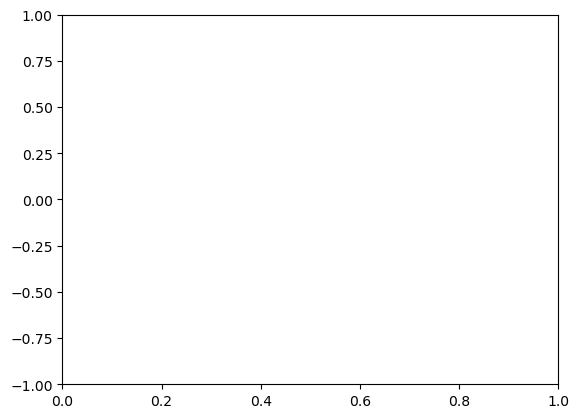

In [141]:
K = np.linspace(0, 0.25 * Lp, 200, dtype=np.float64)
In_out_k = in_out_harmonic(K, t, omega, qtilde=1.5)
#plt.plot(K/omega, 0.5 * K**2 / omega**2 * Fsol_3D_real + In_out_k)
plt.xlim(0, 1)
plt.ylim(-1, 1)
plt.show()

/tmp/ipykernel_645659/1512360211.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  f_out_yuk[i] = _yuk_cs(K[i]/omega)


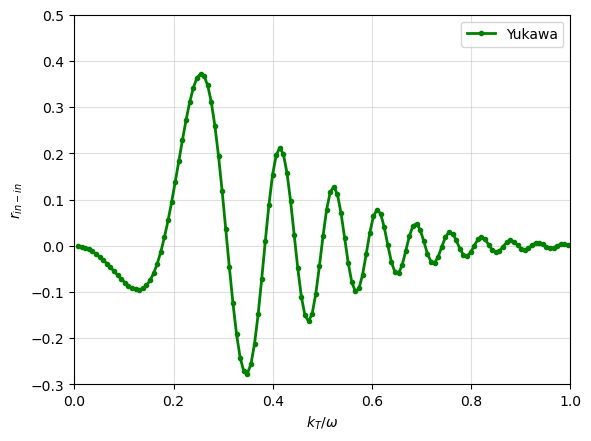

In [142]:
from scipy.interpolate import CubicSpline

#interpolate P[:-10]/omega , P[:-10]/omega*np.real(yuk[:-10]) with spline 
data_yuk = np.loadtxt("data/fsol3D_final_ho_gamma_qq__E_100_z_0.5_q_1.5_mu_0.6.dat").T
#data_htl = np.loadtxt("data/fsol3D_final_htl_gamma_qq__E_100_z_0.5_q_1.5_mu_0.4.dat").T

K = P[:-10] / omega
In_out_yuk = IN_OUT_HO[:-10]
#In_out_htl = P[:-10]/omega * np.real(htl[:-10])

_yuk_cs = CubicSpline(K, In_out_yuk, extrapolate=False)
#_htl_cs = CubicSpline(K, In_out_htl, extrapolate=True)

ratio = 0.325
K = np.linspace(0, ratio * Lp, 180, dtype=np.float64)
N = len(K)
K += ratio * Lp / (N-1)

f_in_yuk = data_yuk.T
f_out_yuk = np.zeros_like(f_in_yuk)

#f_in_htl = data_htl.T
#f_out_htl = np.zeros_like(f_in_htl)

for i in range(len(K)):
    f_out_yuk[i] = _yuk_cs(K[i]/omega)
#    f_out_htl[i] = _htl_cs(K[i]/omega)

plt.plot(K/omega, f_out_yuk + 0.5 * K**2/omega**2 * f_in_yuk, marker = 'o', markersize = 3, linewidth = 2, label='Yukawa', color = "green")
#plt.plot(K/omega, f_out_htl + 0.5 * K**2/omega**2 * f_in_htl, marker = 's', markersize = 3, linewidth = 1, label='HTL', color = "red")
plt.xlim(0, 1)
plt.ylim(-0.3, 0.5)
plt.ylabel(r'$r_{in-in}$')
plt.xlabel(r'$k_T/\omega$')
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

o problema parece ser a maneira como está a lidar com o l (provavelmente l = 0)

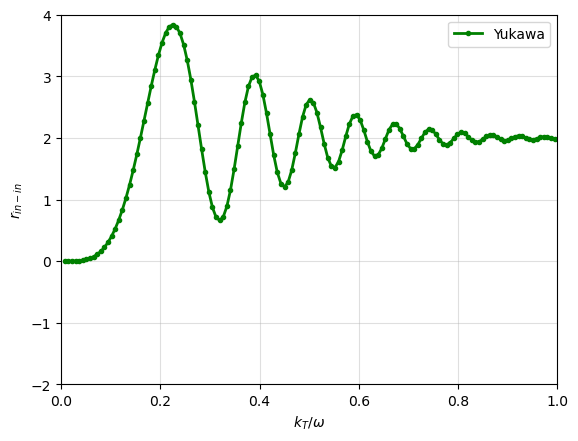

In [143]:
plt.plot(K/omega, 0.5 * K**2/omega**2 * f_in_yuk, marker = 'o', markersize = 3, linewidth = 2, label='Yukawa', color = "green")
#plt.plot(K/omega, f_out_htl + 0.5 * K**2/omega**2 * f_in_htl, marker = 's', markersize = 3, linewidth = 1, label='HTL', color = "red")
plt.xlim(0, 1)
plt.ylim(-2, 4)
plt.ylabel(r'$r_{in-in}$')
plt.xlabel(r'$k_T/\omega$')
plt.legend()
plt.grid(alpha = 0.4)
plt.show()

In [144]:
# plt.plot(K/omega, (f_in_htl)/(f_in_yuk), color = "red")
# plt.ylabel(r'Ratio Yukawa/HTL')
# plt.xlabel(r'$k_T/\omega$')
# plt.xlim(0, 1)
# plt.ylim(0.95, 1.05)
# plt.grid(alpha = 0.4)
# plt.show()

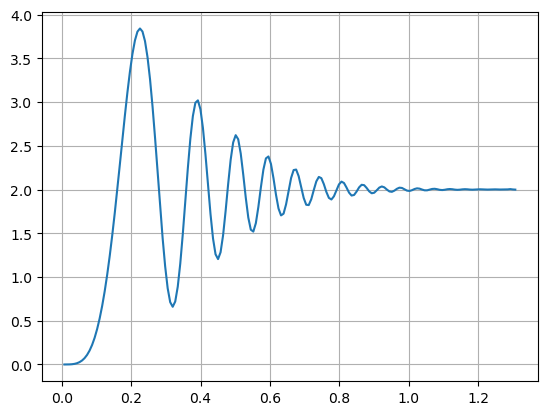

In [145]:
plt.plot(K/omega,0.5 * K**2/omega**2 * f_in_yuk)
plt.grid()